<a href="https://colab.research.google.com/github/LANCARI/MOD-711-Machine-Learning/blob/main/Clustering_Minimum_Spanning_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MOD-711 MACHINE LEARNING  (Grupo A Clustering)
## Clustering - Minimum Spanning Tree

#### Integrantes:
- Frida Aduviri
- Licett Ancari


## 1. Descripción

El algoritmo Minimum Spanning Tree juega un papel importante en la minería de datos, el reconocimiento de patrones y el aprendizaje automático. Entonces, los conjuntos neutrosóficos de valor único (SVNS) son un medio útil para describir y manejar información indeterminada e inconsistente, que los conjuntos difusos y los conjuntos difusos intuicionistas no pueden describir ni tratar. Para agrupar los datos representados por información neutrosófica de valor único, el artículo propone un algoritmo de agrupación de árbol de expansión mínima neutrosófica de valor único (SVNMST). En primer lugar, definimos una medida de distancia generalizada entre SVNS. Luego, presentamos un algoritmo de agrupamiento SVNMST para agrupar datos neutrosóficos de valor único basado en la medida de distancia generalizada de los SVNS. Finalmente, se dan dos ejemplos ilustrativos para demostrar la aplicación y eficacia del enfoque desarrollado

## 2. Birtex y Referencias:

* @article{paivinen2005clustering,
  title={Clustering with a minimum spanning tree of scale-free-like structure},
  author={P{\"a}ivinen, Niina},
  journal={Pattern Recognition Letters},
  volume={26},
  number={7},
  pages={921--930},
  year={2005},
  publisher={Elsevier}
}
* @inproceedings{jana2009efficient,
  title={An efficient minimum spanning tree based clustering algorithm},
  author={Jana, Prasanta K and Naik, Azad},
  booktitle={2009 Proceeding of International Conference on Methods and Models in Computer Science (ICM2CS)},
  pages={1--5},
  year={2009},
  organization={IEEE}
}
* https://www.kaggle.com/code/senpai24602/clustering
* DS Chen, KX Li y LB Zhao, Método de agrupamiento de árboles máximos de gráficos difusos y su aplicación, Oper. Res. Administrar. Ciencia. 16 (2007), 69–73.


## 3. Tipo de Modelo:

**Método de Aprendizaje:** No supervisado.

**Por Parámetro:**  No Paramétrico

**Datos de Aprendizaje:** Funciona en un enfoque "offline"

**Resultado del Entrenamiento:**  No es un modelo


## 4. Algoritmos de Entrenamiento:

* Medidas de distancia de SVNS
* Algoritmo de agrupamiento SVNMST
* Algoritmo de agrupamiento IFMST
* Algoritmo de agrupamiento difuso de MST


## 5. Supuestos y Restricciones:

Supuestos:

1. Conectividad de los datos: El algoritmo supone que los puntos de datos están ubicados en un espacio métrico y que se pueden conectar mediante aristas ponderadas, donde las ponderaciones representan alguna medida de similitud o distancia entre los puntos.

2. Estructura de clústeres basada en conectividad: El MST supone que los clústeres en los datos están relacionados con la estructura de conectividad. Esto significa que los puntos de datos en un mismo clúster están conectados de alguna manera, ya sea directamente o a través de otros puntos.

Restricciones:

1. Sensible a la métrica de distancia: El rendimiento del MST depende de la métrica de distancia utilizada para calcular las ponderaciones de las aristas. La elección de la métrica puede afectar la calidad de los clústeres identificados.

2. Dependencia de parámetros: El MST requiere la especificación de parámetros, como la métrica de distancia y, en algunos casos, una longitud de corte para determinar los clústeres. La elección de estos parámetros puede influir en los resultados y puede ser un proceso exploratorio.

3. Sensible a ruido y outliers: El MST puede ser sensible a ruido y valores atípicos en los datos. Puntos de datos que están aislados o que no siguen la estructura de conectividad pueden introducir clústeres espurios.

4. No garantiza el número óptimo de clústeres: El MST no proporciona una estimación automática del número óptimo de clústeres en los datos. Esto significa que el usuario debe determinar un criterio para cortar el árbol y dividirlo en clústeres.

5. Dependencia de la densidad: El MST tiende a agrupar puntos densos en clústeres, lo que significa que puede no ser adecuado para detectar clústeres de densidad variable o clústeres que no están necesariamente conectados por puntos densos.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [ ]:
import warnings; warnings.filterwarnings('ignore', message='elementwise')

def plot_mst(model, cmap='rainbow'):
    """Utility code to visualize a minimum spanning tree"""
    X = model.X_fit_
    fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)
    for axi, full_graph, colors in zip(ax, [True, False], ['lightblue', model.labels_]):
        segments = model.get_graph_segments(full_graph=full_graph)
        axi.plot(segments[0], segments[1], '-k', zorder=1, lw=1)
        axi.scatter(X[:, 0], X[:, 1], c=colors, cmap=cmap, zorder=2)
        axi.axis('tight')

    ax[0].set_title('Full Minimum Spanning Tree', size=16)
    ax[1].set_title('Trimmed Minimum Spanning Tree', size=16);

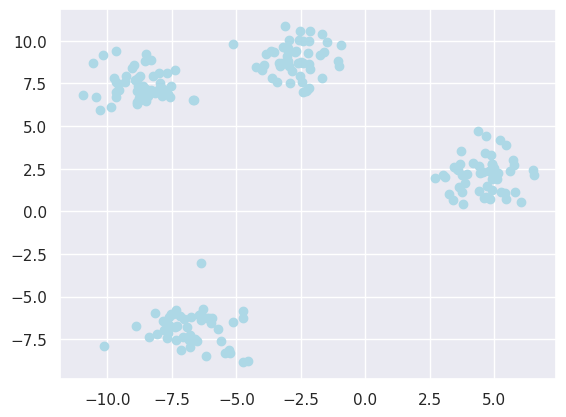

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(200, centers=4, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c='lightblue');

In [ ]:
pip install mst_clustering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mst_clustering: filename=mst_clustering-1.0-py3-none-any.whl size=7665 sha256=54f2264a521e7350e4f6e0f003dea9ef0e7f406679d199fc925a9c3625c241ce
  Stored in directory: /root/.cache/pip/wheels/9c/5a/5c/d27dee53c183bcf4e0c75115536cda670a1110d87d1e023f62
Successfully built mst_clustering


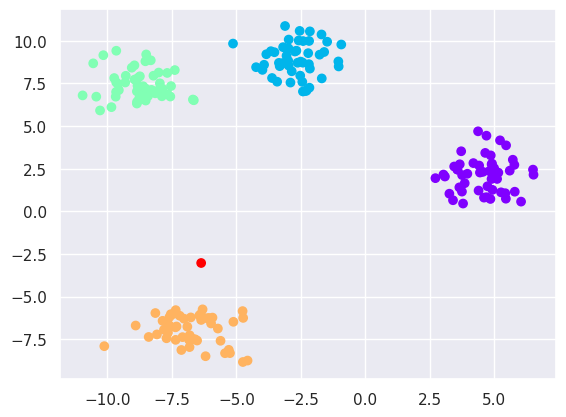

In [ ]:
from mst_clustering import MSTClustering
model = MSTClustering(cutoff_scale=2, approximate=False)
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow');

<ipython-input-2-4faa323c3961>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axi.scatter(X[:, 0], X[:, 1], c=colors, cmap=cmap, zorder=2)


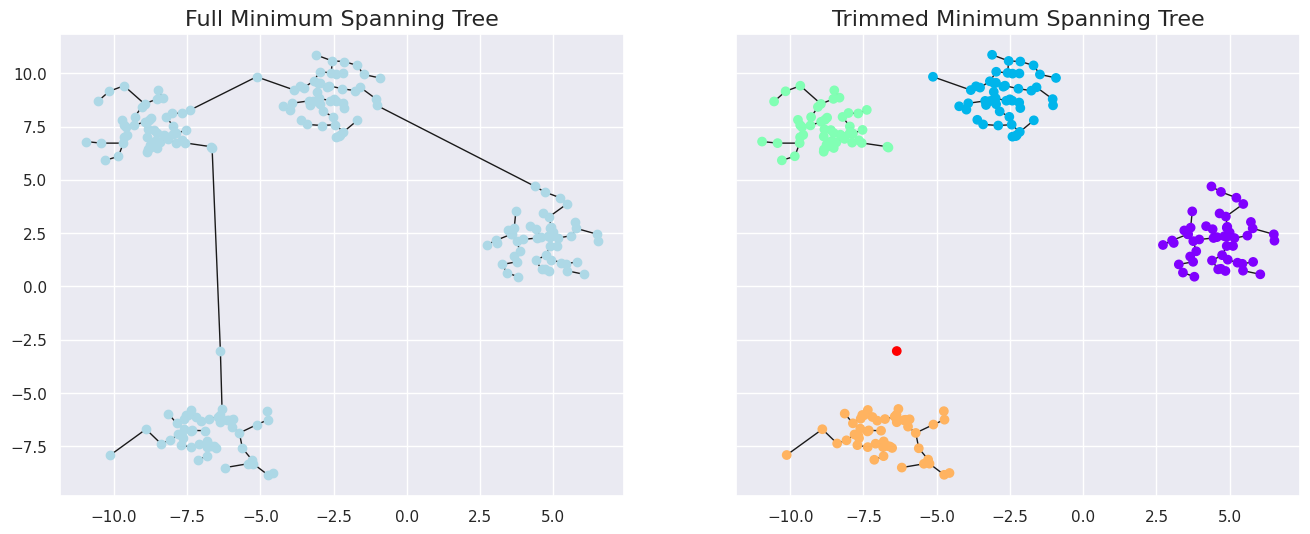

In [ ]:
plot_mst(model)

<ipython-input-7-eefd9bfafddd>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_noisy[:, 0], X_noisy[:, 1], c='lightblue', cmap='spectral_r')


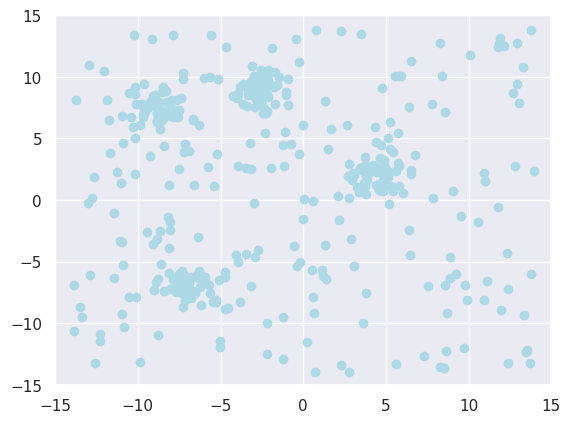

In [ ]:
rng = np.random.RandomState(int(100 * y[-1]))
noise = -14 + 28 * rng.rand(200, 2)

X_noisy = np.vstack([X, noise])
y_noisy = np.concatenate([y, np.full(200, -1, dtype=int)])

plt.scatter(X_noisy[:, 0], X_noisy[:, 1], c='lightblue', cmap='spectral_r')
plt.xlim(-15, 15)
plt.ylim(-15, 15);

<ipython-input-2-4faa323c3961>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axi.scatter(X[:, 0], X[:, 1], c=colors, cmap=cmap, zorder=2)


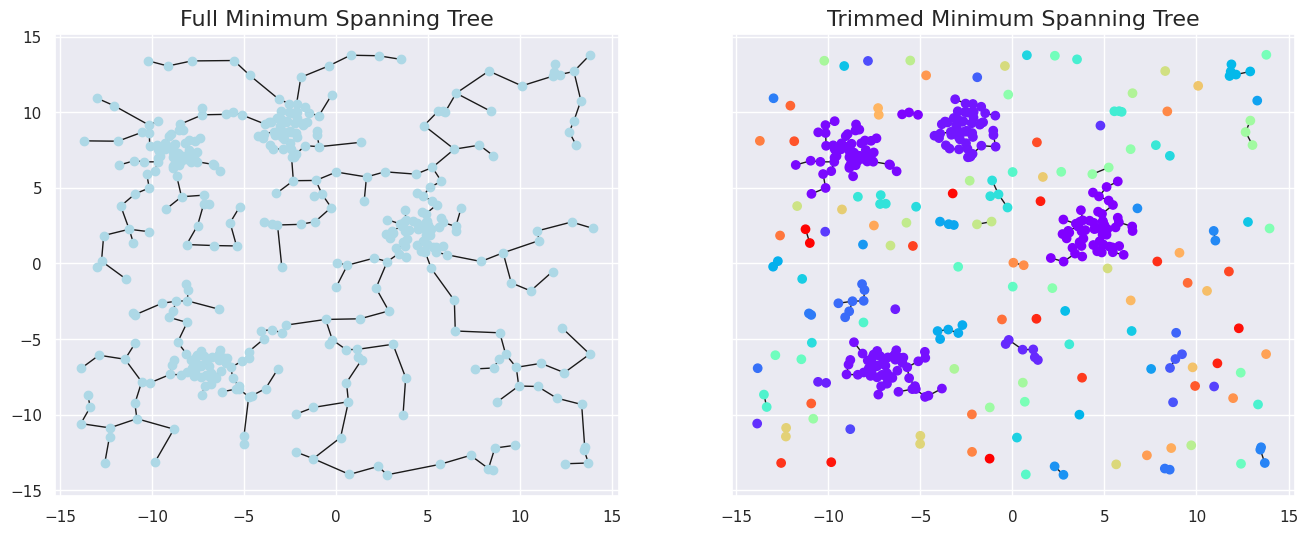

In [ ]:
noisy_model = MSTClustering(cutoff_scale=1)
noisy_model.fit(X_noisy)
plot_mst(noisy_model)

<ipython-input-2-4faa323c3961>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axi.scatter(X[:, 0], X[:, 1], c=colors, cmap=cmap, zorder=2)


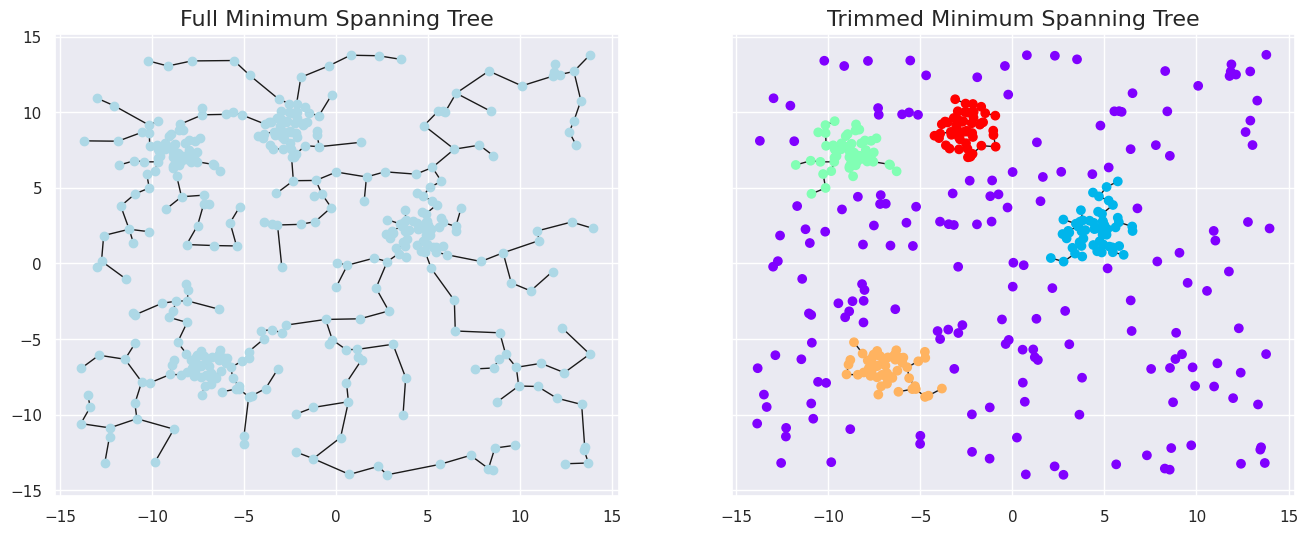

In [ ]:
noisy_model = MSTClustering(cutoff_scale=1, min_cluster_size=10)
noisy_model.fit(X_noisy)
plot_mst(noisy_model)